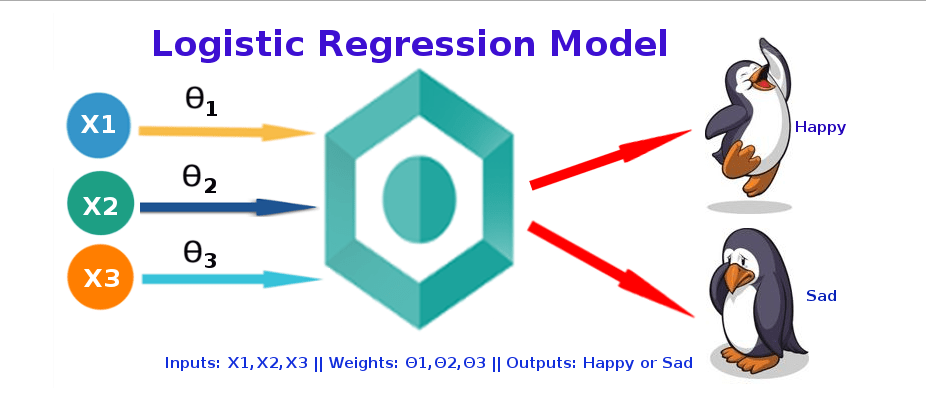

# Exploratory Data Analysis

**Dataset Overview**

The dataset appears to be related to a hearing test and contains the following features:

1. **age**: This column represents the age of the individual taking the hearing test. This feature can be used to analyze the correlation between age and hearing ability.
2. **physical_score**: This column represents a score related to the physical condition of the individual. The exact nature of this score is not specified, but it likely quantifies some aspect of physical fitness or health.
3. **test_result**: This column indicates the result of the hearing test. The value `1` likely denotes a positive result (e.g., passed the test or has normal hearing), while `0` indicates a negative result (e.g., failed the test or has hearing issues). This is the target variable for classification problems.

In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [246]:
df = pd.read_csv("hearing_test.csv")

In [247]:
df0 = df.copy()

In [248]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [251]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [252]:
df.test_result

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

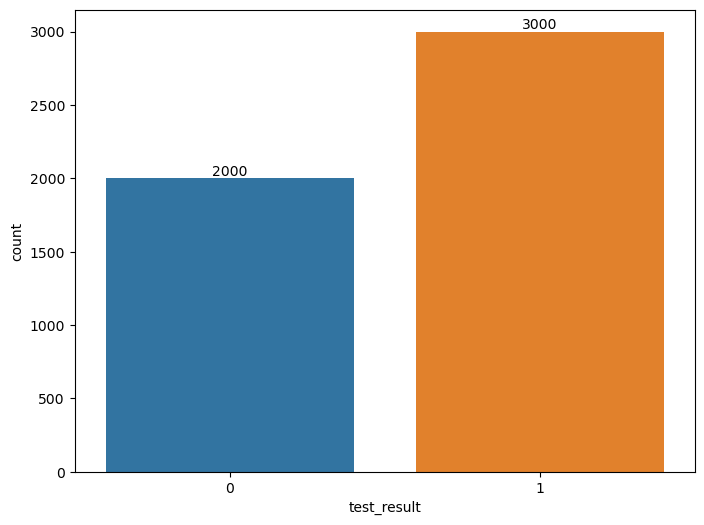

In [253]:
ax = sns.countplot(x= df["test_result"])
ax.bar_label(ax.containers[0]);

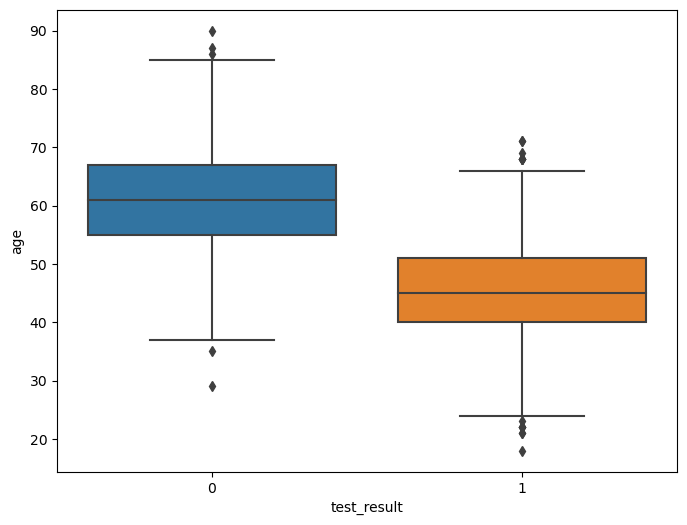

In [254]:
sns.boxplot(x= "test_result", y= "age", data= df);

# When looking at the box plots by age, we can say that the average age of those who pass the hearing test is around 45, 
# while the average age of those who do not pass is around 60. 
# In short, we can say that younger individuals are more likely to pass the test.

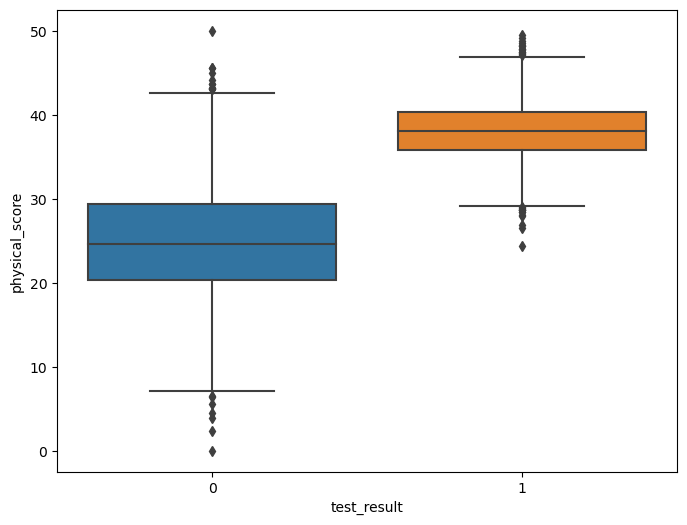

In [255]:
sns.boxplot(x = "test_result", y= "physical_score", data= df);

# When looking at the box plots by physical scores, 
# we can see that the average physical score of those who pass the hearing test is around 37,
# while the average physical score of those who do not pass is around 25. 
# In short, we can say that as the physical score increases, the likelihood of passing the test also increases.

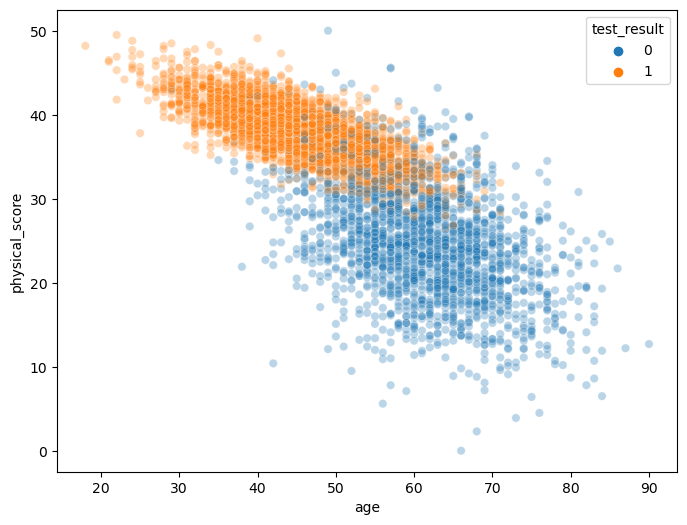

In [256]:
sns.scatterplot(x= "age", y= "physical_score", data= df, hue= "test_result", alpha= 0.3);

# This code creates a scatter plot to visualize the relationship between "age" and "physical_score" in the dataset. 
# The hue="test_result" parameter color-codes the data points based on the "test_result" category, 
# allowing you to see how the results are distributed across different age and physical score values. 
# The alpha=0.3 parameter sets the transparency of the points, making it easier to visualize overlapping data points.

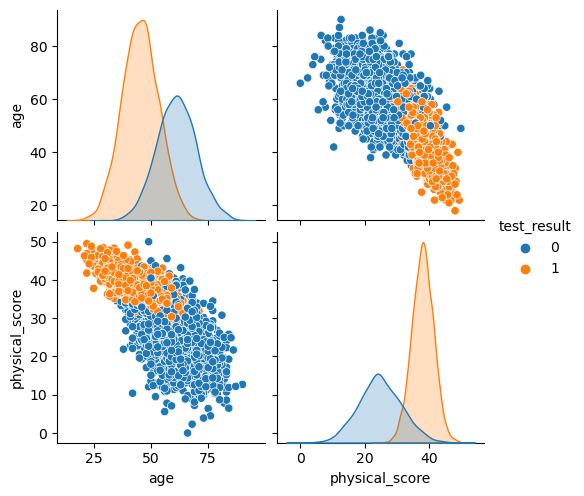

In [257]:
sns.pairplot(df, hue= "test_result");

# This code uses the pairplot function to visualize the relationships between all pairs of variables in the dataset. 
# For each pair of variables, scatter plots are generated, and the diagonal shows the distribution of each variable. 
# The hue="test_result" parameter color-codes the data points based on the "test_result" category, 
# allowing you to examine the distribution according to different test results.

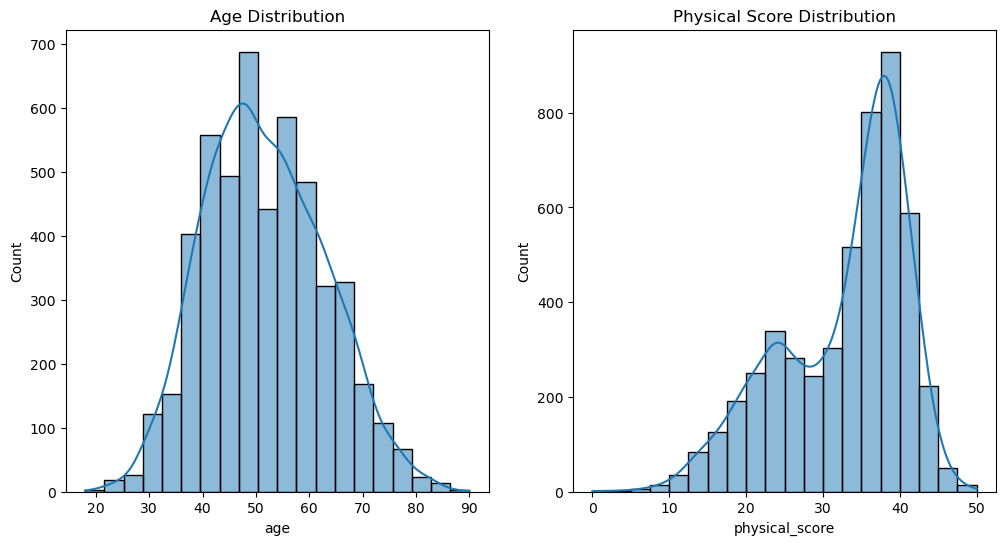

In [258]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["physical_score"], bins=20, kde=True)
plt.title("Physical Score Distribution")

plt.show()

# This code block creates two separate histograms to visualize the distribution of the "age" and "physical_score" variables in the dataset

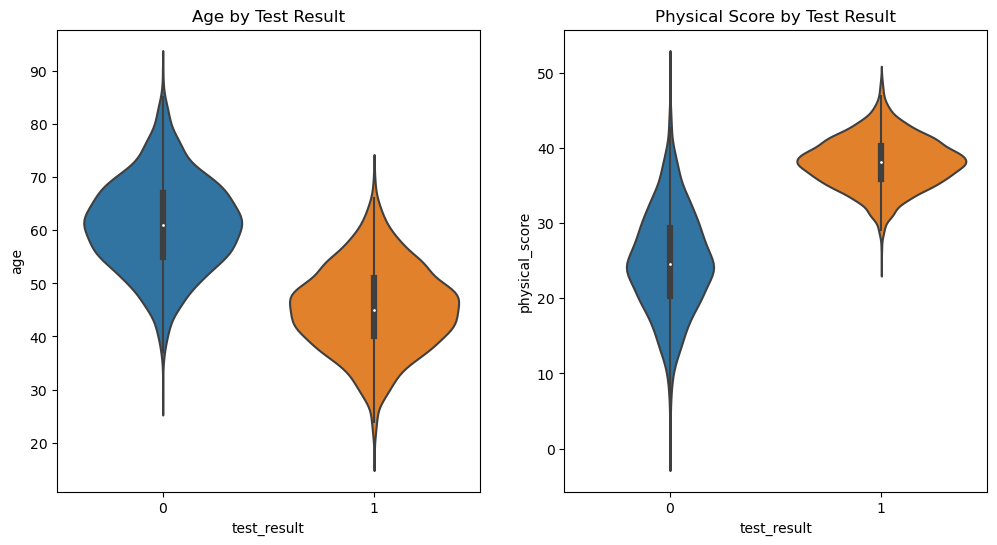

In [259]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x="test_result", y="age", data=df)
plt.title("Age by Test Result")

plt.subplot(1, 2, 2)
sns.violinplot(x="test_result", y="physical_score", data=df)
plt.title("Physical Score by Test Result")

plt.show()

In [260]:
df.groupby("test_result").agg(
    mean_age=("age", "mean"),
    median_age=("age", "median"),
    mean_physical_score=("physical_score", "mean"),
    median_physical_score=("physical_score", "median")
)

,mean_age,median_age,mean_physical_score,median_physical_score
test_result,,,,
0,61.052,61.000,24.829,24.600
1,45.314,45.000,38.048,38.100


In [261]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
age                3
physical_score    12
test_result        0
dtype: int64


In [262]:
df.shape

(5000, 3)

In [263]:
# Filter out the outliers

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [264]:
df.shape

(4985, 3)

In [265]:
# Check for outliers in the cleaned dataset

outliers_after = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column after cleaning:")
print(outliers_after)

Number of outliers in each column after cleaning:
age               0
physical_score    0
test_result       0
dtype: int64


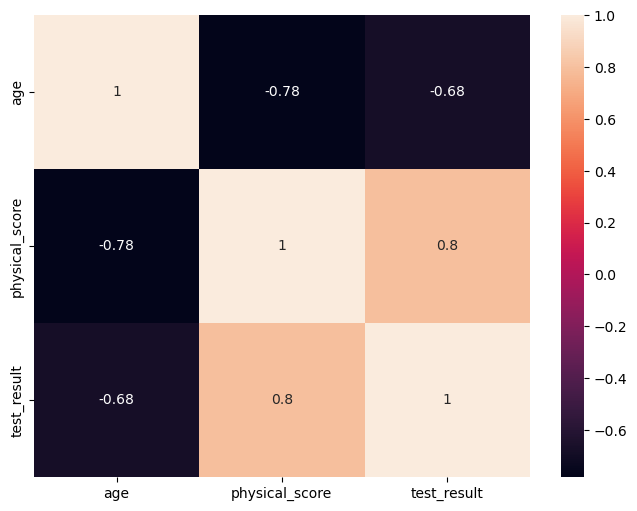

In [266]:
sns.heatmap(df.corr(), annot= True);

# This code creates a heatmap to visualize the correlations between the numerical variables in the dataset. 
# The df.corr() function calculates the correlation coefficients between the variables. 
# The annot=True parameter displays these correlation coefficients numerically within the cells of the heatmap,
# making it easy to see how the variables are related to each other.

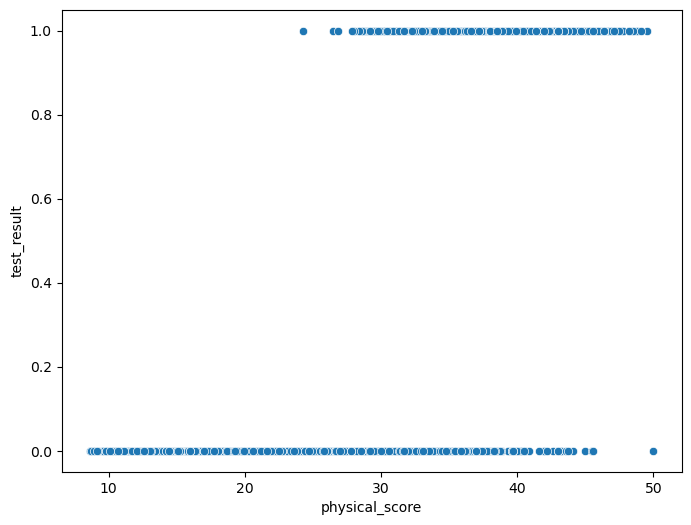

In [267]:
 sns.scatterplot(x= "physical_score", y= "test_result", data= df);

# Modeling for Logistic Regression

## Train | Test Split

In [268]:
X = df.drop("test_result", axis= 1)
y = df.test_result

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 101)

## Modeling with Scaling Data

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [274]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps= operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [275]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [276]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

# `predict_proba` shows the probabilities of the observations in the test data belonging to each class.
# The first value represents the probability of belonging to class 0, while the second value represents the probability of belonging to class 1.
# The observation is assigned to the class with the higher probability.

array([[9.99979003e-01, 2.09971806e-05],
       [9.68361221e-01, 3.16387792e-02],
       [9.69892951e-01, 3.01070488e-02],
       ...,
       [2.17407621e-01, 7.82592379e-01],
       [4.62940869e-01, 5.37059131e-01],
       [7.30118785e-03, 9.92698812e-01]])

In [277]:
test_data = pd.concat([X_test, y_test], axis= 1)
test_data

# First, we obtain the `test_data` DataFrame by concatenating `X_test` and `y_test`.

,age,physical_score,test_result
3835,77.000,12.100,0
2192,57.000,25.000,0
747,60.000,25.400,0
4830,61.000,21.200,0
1851,51.000,36.100,1
...,...,...,...
2395,49.000,39.900,1
3521,38.000,37.400,1
2528,62.000,36.300,1
3597,58.000,33.100,1


In [278]:
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data

# And we add the `pred_proba` column/feature, which shows the probabilities of belonging to class 1, to the `test_data` DataFrame.

,age,physical_score,test_result,pred_proba
3835,77.000,12.100,0,0.000
2192,57.000,25.000,0,0.032
747,60.000,25.400,0,0.030
4830,61.000,21.200,0,0.004
1851,51.000,36.100,1,0.885
...,...,...,...,...
2395,49.000,39.900,1,0.980
3521,38.000,37.400,1,0.974
2528,62.000,36.300,1,0.783
3597,58.000,33.100,1,0.537


In [279]:
test_data["pred"] = y_pred
test_data

# The target class, whatever it is, is always set to 1.
# `test_result` matches with `pred_proba` (the predicted probability value) and `pred` values.

# While performing the prediction, the model assigns probabilities greater than 0.5 to class 1 and probabilities less than 0.5 to class 0 in the background. 
# We add the model's predictions as the `pred` feature to the `test_data` DataFrame.

,age,physical_score,test_result,pred_proba,pred
3835,77.000,12.100,0,0.000,0
2192,57.000,25.000,0,0.032,0
747,60.000,25.400,0,0.030,0
4830,61.000,21.200,0,0.004,0
1851,51.000,36.100,1,0.885,1
...,...,...,...,...,...
2395,49.000,39.900,1,0.980,1
3521,38.000,37.400,1,0.974,1
2528,62.000,36.300,1,0.783,1
3597,58.000,33.100,1,0.537,1


In [280]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
2266,50.000,34.500,1,0.801,1
126,40.000,39.000,1,0.985,1
4814,41.000,38.100,1,0.976,1
1890,67.000,23.000,0,0.006,0
3131,62.000,31.200,0,0.266,0
773,64.000,25.700,0,0.025,0
4876,63.000,17.700,0,0.001,0
1896,63.000,20.600,0,0.003,0
3132,49.000,34.500,1,0.813,1
1141,39.000,35.100,1,0.925,1


In [281]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

# Observations with incorrect predictions


,age,physical_score,test_result,pred_proba,pred
4749,54.000,38.700,0,0.952,1
509,58.000,30.600,1,0.273,0
1113,60.000,36.400,0,0.815,1
1616,52.000,37.400,0,0.927,1
4753,49.000,38.400,0,0.962,1
...,...,...,...,...,...
3393,61.000,32.900,1,0.457,0
3992,64.000,32.500,1,0.358,0
2035,58.000,38.700,0,0.935,1
4140,54.000,35.400,0,0.816,1


# Model Performance on Classification Tasks

In [282]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, log_loss

# Importing the libraries necessary to calculate performance metrics
# accuracy_score: Computes the accuracy of the model
# precision_score: Computes the ratio of true positive predictions to the total positive predictions
# recall_score: Computes the ratio of true positive predictions to the total actual positives
# f1_score: Computes the harmonic mean of Precision and Recall
# log_loss: Computes the model's accuracy loss based on the predicted probabilities

In [283]:
accuracy_score(y_test, y_pred)

0.9157979149959904

In [284]:
precision_score(y_test, y_pred, pos_label=1)

# pos_label=1: The label for the positive class
# By default, it returns the precision_score for class 1.
# It shows how accurate the predictions are for predicting class 1.
# A precision of 0.1 means that the model correctly predicted 10% of its predictions.

# For the score related to class 0, pos_label should be set to 0.

0.9163498098859315

In [285]:
recall_score(y_test, y_pred, pos_label=1)

# pos_label=1: The label for the positive class
# By default, it returns the recall_score for class 1.
# It shows how accurate the predictions are for predicting class 1.
# A recall of 0.1 means that the model correctly predicted 10% of the actual positives for the positive class.
# For the score related to the negative class, pos_label should be set to 0.

0.9488188976377953

In [286]:
f1_score(y_test, y_pred)

# f1_score calculates the harmonic mean of precision and recall.
# It balances both precision and recall and provides a single metric that considers both.
# There is always a trade-off between precision and recall; as precision increases/decreases, recall decreases/increases.
# An f1_score close to 1 indicates that the model has high precision and recall values.
# An f1_score close to 0 indicates that the model has low precision and recall values.

0.932301740812379

In [287]:
log_loss(y_test, y_pred)

# log_loss measures how much the predicted probabilities deviate from the true classes.
# A lower log_loss value indicates higher accuracy of the model's predictions.
# A high log_loss value indicates that the model's predictions are far from the true classes.

3.0349507665255024

In [288]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [289]:
confusion_matrix(y_test, y_pred)

# The confusion matrix includes values for true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
# Each cell in the matrix allows for a detailed analysis of the model's performance.

array([[419,  66],
       [ 39, 723]], dtype=int64)

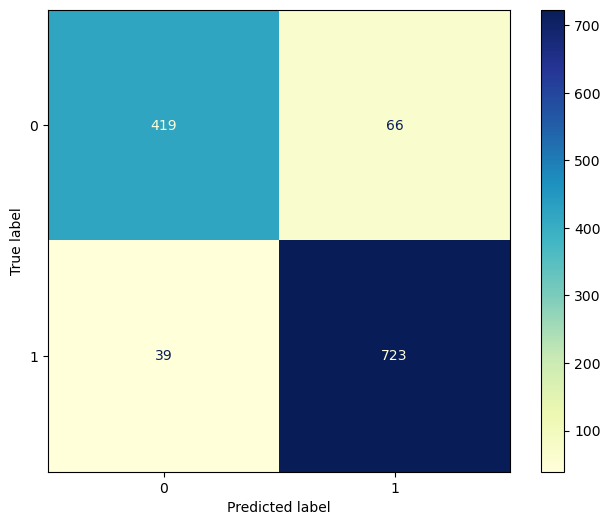

In [290]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="YlGnBu");

# ConfusionMatrixDisplay is used to visualize the confusion matrix.
# from_estimator: Creates and visualizes the confusion matrix based on the model's predictions.
# pipe_model: The model used for predictions
# cmap="YlGnBu": Specifies the colormap for visualization, where "YlGnBu" (Yellow-Green-Blue) is used.

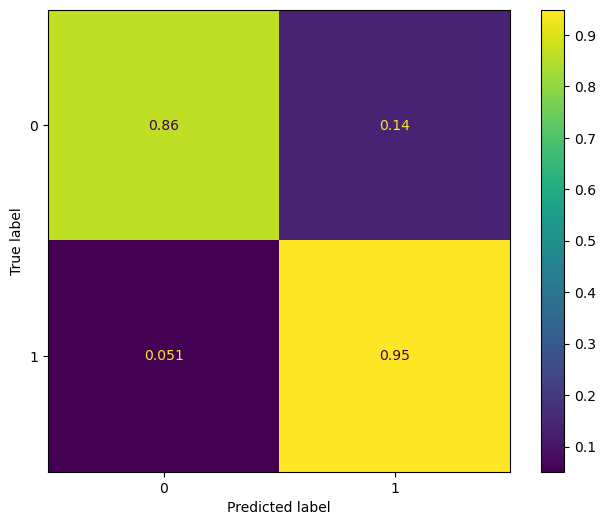

In [291]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true');

# normalize='true': Normalizes the confusion matrix, 
# with each cell value shown as a proportion of the total number of examples for the true class.

# I correctly predicted 86% of the instances of class 0.
# I correctly predicted 96% of the instances of class 1.

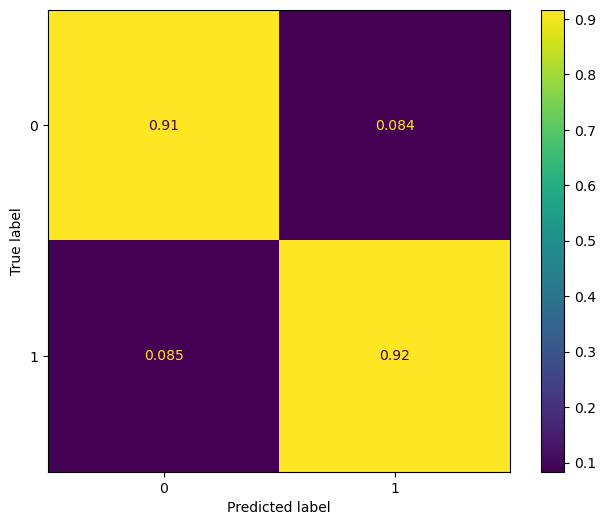

In [292]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='pred');

# normalize='pred': Normalizes the confusion matrix, 
# with each cell value shown as a proportion of the total number of examples for the predicted class.

# I correctly predicted 92% of the instances I predicted as class 0.
# I correctly predicted 91% of the instances I predicted as class 1.

In [293]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# We define our `eval_metric` function to observe the scores for both the training and test sets.    

In [294]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Speaking for the label 1:
# A precision of 0.91 means that 91% of my predictions were accurate.
# A recall of 0.96 means that I correctly identified 96% of the instances that are actually class 1.
# Since the f1 score provides the harmonic mean of precision and recall, 
# it should be interpreted in relation to your target metric (recall, precision). 
# Interpreting it alone can lead to misleading conclusions.

# Whether there is overfitting in the data is determined by comparing the test and train scores for the target class. 
# If the train set scores are significantly better than the test data, indicating a gap, it suggests overfitting.
# However, we do not determine overfitting/underfitting solely based on the train and test data. 
# A definitive decision on overfitting/underfitting will be made after cross-validation.

Test_Set
[[419  66]
 [ 39 723]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       485
           1       0.92      0.95      0.93       762

    accuracy                           0.92      1247
   macro avg       0.92      0.91      0.91      1247
weighted avg       0.92      0.92      0.92      1247


Train_Set
[[1302  198]
 [ 120 2118]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1500
           1       0.91      0.95      0.93      2238

    accuracy                           0.91      3738
   macro avg       0.92      0.91      0.91      3738
weighted avg       0.91      0.91      0.91      3738



## Cross Validation

In [295]:
from sklearn.model_selection import cross_validate

In [296]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [297]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=15,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index= range(1, 16))
df_scores

# To definitively determine overfitting/underfitting through cross-validation, 
# we set `return_train_score=True` to compare both train and validation set scores in each iteration.

# If we apply scaling to our data, we need to use pipelines in CV and grid search processes to prevent data leakage.

# The scores returned below are always for class 1. Additional steps are needed to obtain metrics for class 0 in CV scores.

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.018,0.016,0.916,0.915,0.922,0.915,0.940,0.946,0.931,0.930
2,0.011,0.013,0.888,0.917,0.886,0.917,0.933,0.948,0.909,0.932
3,0.008,0.012,0.924,0.914,0.907,0.915,0.973,0.945,0.939,0.930
4,0.009,0.011,0.896,0.917,0.907,0.916,0.919,0.948,0.913,0.932
5,0.012,0.015,0.944,0.913,0.925,0.914,0.987,0.944,0.955,0.929
6,0.009,0.012,0.920,0.914,0.916,0.914,0.953,0.946,0.934,0.930
7,0.008,0.011,0.940,0.913,0.929,0.913,0.973,0.944,0.951,0.928
8,0.013,0.012,0.912,0.915,0.926,0.914,0.926,0.948,0.926,0.931
9,0.013,0.013,0.892,0.917,0.886,0.917,0.940,0.947,0.912,0.932
10,0.011,0.009,0.912,0.915,0.926,0.915,0.926,0.946,0.926,0.930


In [298]:
df_scores.mean()[2:]

test_accuracy     0.915
train_accuracy    0.915
test_precision    0.915
train_precision   0.915
test_recall       0.946
train_recall      0.946
test_f1           0.930
train_f1          0.930
dtype: float64

In [299]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[419  66]
 [ 39 723]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       485
           1       0.92      0.95      0.93       762

    accuracy                           0.92      1247
   macro avg       0.92      0.91      0.91      1247
weighted avg       0.92      0.92      0.92      1247


Train_Set
[[1302  198]
 [ 120 2118]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1500
           1       0.91      0.95      0.93      2238

    accuracy                           0.91      3738
   macro avg       0.92      0.91      0.91      3738
weighted avg       0.91      0.91      0.91      3738



##  With Best Parameters (GridsearchCV)

In [307]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

C = np.logspace(-1, 5, 20)

param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    },
    {
        "logistic__max_iter": [100, 200, 300],
        "logistic__class_weight": [None, "balanced"],
        "logistic__tol": [1e-4, 1e-3, 1e-2]
    }
]

grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=10,
                          scoring="recall")

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+...
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']},
                         {'logistic__class_weight': [None, 'balanced'],
                          'logistic__max_iter': [100, 200, 300],
                          'logistic__tol': [0.0001, 0.001, 0.01]}],
             scoring='recall')

In [308]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__l1_ratio': 0.4444444444444444,
 'logistic__penalty': 'elasticnet',
 'logistic__solver': 'saga'}

In [309]:
grid_model.best_score_

0.9490570948110186

In [310]:
y_pred = grid_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

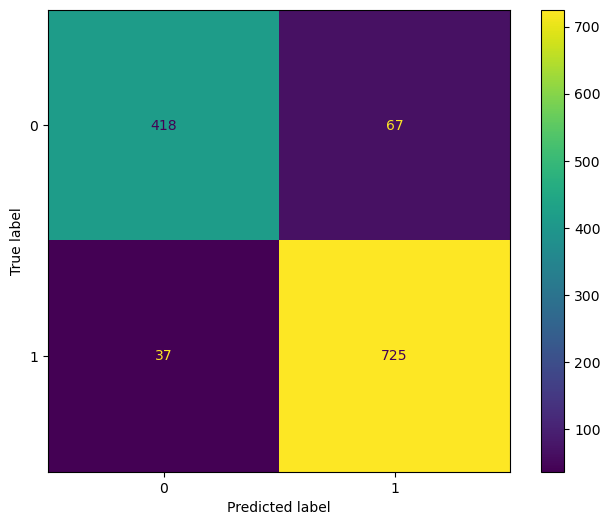

In [311]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [312]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[418  67]
 [ 37 725]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       485
           1       0.92      0.95      0.93       762

    accuracy                           0.92      1247
   macro avg       0.92      0.91      0.91      1247
weighted avg       0.92      0.92      0.92      1247


Train_Set
[[1298  202]
 [ 116 2122]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1500
           1       0.91      0.95      0.93      2238

    accuracy                           0.91      3738
   macro avg       0.92      0.91      0.91      3738
weighted avg       0.92      0.91      0.91      3738



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [313]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score

# We import performance metrics and visualization tools.
# RocCurveDisplay: Used to visualize the ROC curve.
# PrecisionRecallDisplay: Used to visualize the Precision-Recall curve.
# roc_auc_score: Computes the ROC AUC (Area Under Curve) score.
# auc: Computes the area under the curve.
# roc_curve: Calculates the necessary values (FPR, TPR, and thresholds) for the ROC curve.
# average_precision_score: Computes the average precision score.

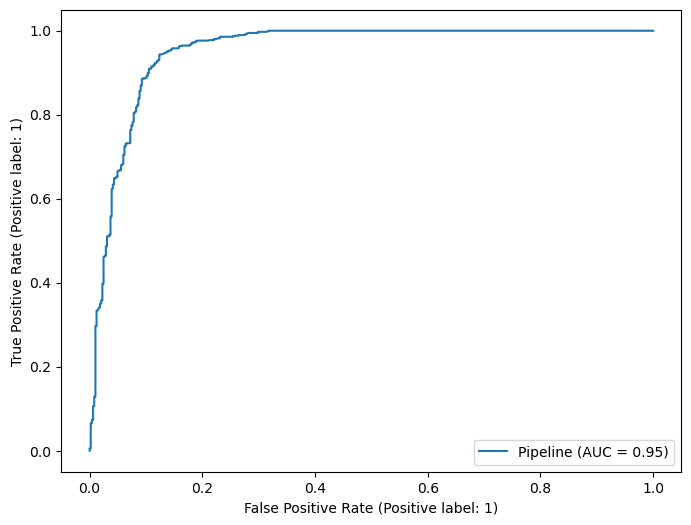

In [314]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

# Provides an indication of how well the model performs. It is an important metric, particularly used in balanced datasets.
# An AUC of 0.95 means that my model is, on average, 95% successful in distinguishing label 1 from label 0.

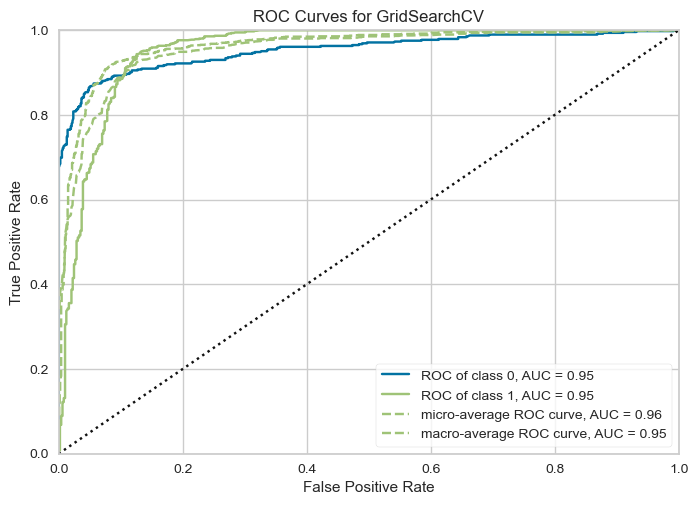

In [315]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

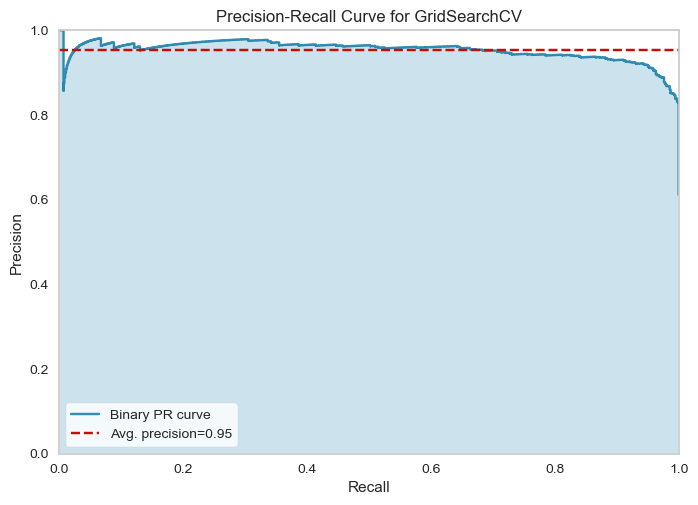

In [316]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model
viz = PrecisionRecallCurve(
    model,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [235]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9522647942203102

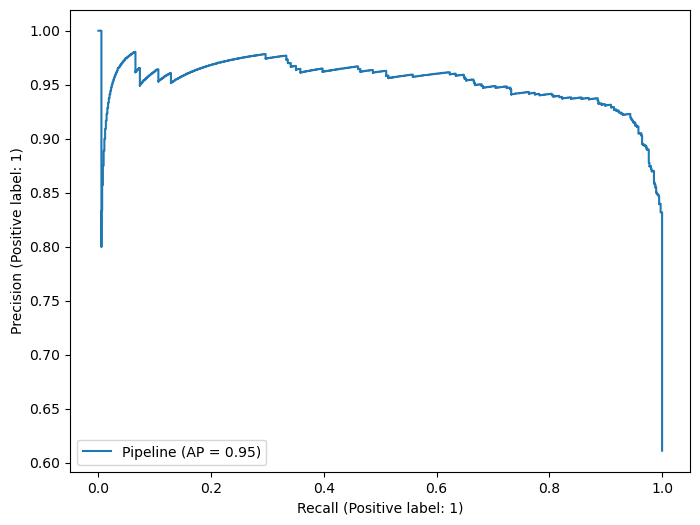

In [236]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

# In balanced datasets, both AUC score and Average Precision score may return similar values. 
# However, it is a good practice to use AUC for balanced datasets and Average Precision scores for imbalanced datasets.

# We use Average Precision scores in imbalanced datasets.

In [237]:
average_precision_score(y_test, y_pred_proba[:,1])

0.9521066830979912

# Final Model and Model Deployment


In [317]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps= operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [318]:
import pickle 
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [319]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [320]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4985.000,51.544,11.227,18.000,43.000,51.000,60.000,85.000
physical_score,4985.000,32.836,8.060,8.600,26.800,35.400,38.900,50.000
test_result,4985.000,0.602,0.490,0.000,0.000,1.000,1.000,1.000


In [321]:
my_dict = {"age": [27, 38],
           "physical_score": [13, 42]
          }

In [322]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,27,13
1,38,42


In [323]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [324]:
sample["pred"] = predictions
sample["pred_proba_0"] = predictions_proba[:,0]
sample["pred_proba_1"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba_0,pred_proba_1
0,27,13,0,0.998,0.002
1,38,42,1,0.004,0.996
